In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv('./业绩报表_2023-03-31.csv')
df = df.drop_duplicates(subset=['股票代码','股票简称','最新公告日期'])
df = df.sort_values(by = ['股票代码'])
df.replace("None", 0, inplace=True)
df.reset_index(drop=True, inplace=True)
df


,股票代码,股票简称,最新公告日期,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),同比增长(%).1,每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),季度环比增长(%).1,利润分配,所处行业
0,1,平安银行,2023-04-25 00:00:00,0.65,45098000000,1.460200e+10,3.39,-2.4000692536,13.60,19.416727,5.624858,0,8.3305,64.8639,0,银行
1,2,万科A,2023-04-29 00:00:00,0.1251,68474007399.21,1.445811e+09,0.6,9.2663215029,1.16,20.620089,0.586830,15.4473261534,-58.7916,-74.0306,0,房地产开发
2,4,ST国华,2023-04-29 00:00:00,-0.0559,21255770.69,-7.427186e+06,-2.13,88.709843837,40.92,2.597512,-0.225304,60.8712200028,-74.1534,98.6205,0,软件开发
3,5,ST星源,2023-04-29 00:00:00,-0.0026,28171813.23,-2.802013e+06,-0.23,-3.7161857039,-279.00,1.142891,-0.039592,5.6297168274,-74.2662,98.3133,0,环保行业
4,6,深振业A,2023-04-29 00:00:00,-0.009,265640113.06,-1.208588e+07,-0.15,-24.4035197821,-127.20,5.844291,-0.478643,37.565557502,-87.9851,-105.5304,0,房地产开发
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,900947,振华B股,2023-04-29 00:00:00,0.024,6019689227,1.295373e+08,0.85,26.1875850694,747.09,2.806308,-0.175318,14.3175348843,-46.3125,-57.4741,0,通用设备
5480,900948,伊泰B股,2023-04-26 00:00:00,0.99,13717783116.09,3.220750e+09,6.28,-8.0095494961,-1.93,16.297773,0.444897,40.8923053639,-7.7981,509.4714,0,煤炭行业
5481,900952,锦港B股,2023-04-29 00:00:00,0.01,881536370.21,2.564205e+07,0.38,46.6326415457,-43.82,3.340131,0.178838,16.9785406817,-14.1958,-48.9434,0,航运港口
5482,900953,凯马B,2023-04-29 00:00:00,-0.0028,741095193.12,-1.765618e+06,-0.41,-25.8491720515,-209.24,0.668364,0.030578,4.3597069634,8.5835,97.0013,0,汽车零部件


In [ ]:
df.head(10)

In [ ]:
df.describe()

,股票代码,净利润(元),同比增长(%).1,每股净资产(元),每股经营现金流量(元)
count,5484.000000,5.484000e+03,5484.000000,5484.000000,5484.000000
mean,388139.842815,2.753574e+08,39.810318,7.196366,-0.010364
std,285517.973506,2.634899e+09,916.466583,7.532626,1.011458
min,1.000000,-3.803000e+09,-29383.743282,-20.742510,-18.915367
25%,2887.750000,1.519267e+06,-45.472500,3.156360,-0.181911
50%,301280.500000,1.935334e+07,4.755000,5.286974,-0.004722
75%,603324.500000,8.083908e+07,49.400000,8.853095,0.146134
max,900957.000000,9.016400e+10,39646.730000,173.759014,27.270530


In [ ]:
df.to_csv('./业绩报表(处理后).csv',index = False)

In [2]:
df1 = pd.read_csv('./业绩报表(处理后).csv')
df1

,股票代码,股票简称,最新公告日期,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),同比增长(%).1,每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),季度环比增长(%).1,利润分配,所处行业
0,1,平安银行,2023-04-25 00:00:00,0.6500,4.509800e+10,1.460200e+10,3.39,-2.400069,13.60,19.416727,5.624858,0.000000,8.3305,64.8639,0,银行
1,2,万科A,2023-04-29 00:00:00,0.1251,6.847401e+10,1.445811e+09,0.60,9.266322,1.16,20.620089,0.586830,15.447326,-58.7916,-74.0306,0,房地产开发
2,4,ST国华,2023-04-29 00:00:00,-0.0559,2.125577e+07,-7.427186e+06,-2.13,88.709844,40.92,2.597512,-0.225304,60.871220,-74.1534,98.6205,0,软件开发
3,5,ST星源,2023-04-29 00:00:00,-0.0026,2.817181e+07,-2.802013e+06,-0.23,-3.716186,-279.00,1.142891,-0.039592,5.629717,-74.2662,98.3133,0,环保行业
4,6,深振业A,2023-04-29 00:00:00,-0.0090,2.656401e+08,-1.208588e+07,-0.15,-24.403520,-127.20,5.844291,-0.478643,37.565558,-87.9851,-105.5304,0,房地产开发
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,900947,振华B股,2023-04-29 00:00:00,0.0240,6.019689e+09,1.295373e+08,0.85,26.187585,747.09,2.806308,-0.175318,14.317535,-46.3125,-57.4741,0,通用设备
5480,900948,伊泰B股,2023-04-26 00:00:00,0.9900,1.371778e+10,3.220750e+09,6.28,-8.009549,-1.93,16.297773,0.444897,40.892305,-7.7981,509.4714,0,煤炭行业
5481,900952,锦港B股,2023-04-29 00:00:00,0.0100,8.815364e+08,2.564205e+07,0.38,46.632642,-43.82,3.340131,0.178838,16.978541,-14.1958,-48.9434,0,航运港口
5482,900953,凯马B,2023-04-29 00:00:00,-0.0028,7.410952e+08,-1.765618e+06,-0.41,-25.849172,-209.24,0.668364,0.030578,4.359707,8.5835,97.0013,0,汽车零部件


## 词云图绘制
使用所处行业的字段绘制词云图，词云图中字体大的表示行业的公司数量在市场中占比大。

In [5]:
hangye = pd.DataFrame(df1['所处行业'])
hangye

,所处行业
0,银行
1,房地产开发
2,软件开发
3,环保行业
4,房地产开发
...,...
5479,通用设备
5480,煤炭行业
5481,航运港口
5482,汽车零部件


In [6]:
hangye.to_csv('./所处行业.txt', sep='\t', index=False)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\26511\AppData\Local\Temp\jieba.cache
Loading model cost 0.644 seconds.
Prefix dict has been built successfully.


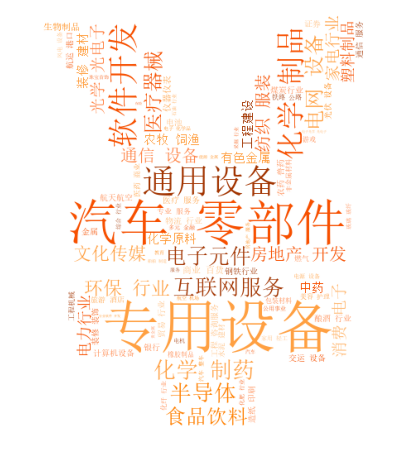

In [7]:
# -*- coding: UTF-8 -*-
# 导入相应的库
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colors
from PIL import Image
import numpy as np
 
 
# 导入文本数据进行简单的文本处理，去掉换行符，半角和全角空格
text=open("./所处行业.txt",encoding='utf8').read()
text=text.replace('\n',"").replace("\u3000","").replace("\u0020","")
 
# 分词，返回结果为词的列表
text_cut=jieba.cut(text)
# 将分好的词用某个符号分割开连成字符串
text_cut=" ".join(text_cut)
 
# 导入停词,用于去掉文本中类似于'啊'、'你'，'我'之类的词
stop_words=open("./stop_words_zh.txt",encoding="utf8").read().split("\n")
 
#导入背景图，注意背景图除了目标形状外，其余地方都应是空白的
background_image=np.array(Image.open("./背景.jpg"))
 
#设置词云中字体颜色可选择的范围
color_list=['#A23400','#F75000','#FF8040',"#FF8000","#FFA042",'#FFBB77']
colormap=colors.ListedColormap(color_list)
 
 
# 使用WordCloud生成词云
word_cloud=WordCloud(font_path="simsun.ttc",  # 设置词云字体
                       background_color="white",width=1000,height=880, # 词云图的背景颜色、高度和宽度
                       mask=background_image, # 指定词云的形状
                       max_words=100,
                       colormap=colormap,
                       stopwords=stop_words) # 去掉的停词
word_cloud.generate(text_cut)
 
 
# 运用matplotlib展现结果
plt.subplots(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()